# Exploratory Data Analysis in Python

**변수 설명**
* `A10 Autism Spectrum Quotient` : AQ-10으로 불리는 시험으로 10개의 문항을 가지고 자폐인인지 판단할 수 있는 참고용 설문지. 수치형(0, 1)
* `Social Responsiveness Scale` : 부모나 교사에게 아동이 보인 사회적 상호작용의 특징에 대해 질문하는 설문지로, 점수가 높을수록 사회적 기능이 낮음을 의미. 수치형(0 ~ 10)
* `Age_Years` : 나이. 수치형(1 ~ 18)
* `Qchat_10_Score` : AQ-10 10문항의 합(총점). 수치형(0 ~ 10)
* `Speech Delay/Language Disorder` : 말하거나 언어에 대한 지연 및 장애. 논리값
* `Learning disorder` : 배우는데 존재한 장애. 논리값
* `Genetic Disorders` : 장애에 대한 유전. 논리값
* `Depression` : 우울함. 논리값
* `Global developmental delay/intellectual disability` : 전반적인 발달 지연 및 지적 장애. 논리값
* `Social/Behavioural Issues` : 사회적, 행동적 문제
* `Childhood Autism Rating Scale` : 부모가 쉽게 이용할 수 있는 자폐 진단 테스트의 점수. 수치형(1 ~ 4)
* `Anxiety disorder` : 불안 장애. 논리값
* `Sex` : 성별. 범주형(M, F)
* `Ethnicity` : 인종. 범주형(Asian, Black, Hispanic, Latino, Middle Eastern, Mixed, Native Indian, Others, PaciFica, South Asian, White European)
* `Jaundice` : 황달. 논리값
* `Family mem with ASD` : 가족 구성원 중 ASD를 가지고 있는지 여부. 논리값
* `Who completed the test` : 테스트를 진행한 사람. 범주형(Family Memeber, Health Care Professional, Others, School and NGO, Self)
* **`ASD traits`** : ASD 여부

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read the csv file from our directory and display it as dataframe
df = pd.read_csv('/home/jovyan/work/data_csv.csv')
df.head(10)

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes
5,6,1,1,0,0,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Black,No,No,Family Member,Yes
6,7,1,0,0,1,1,1,0,0,1,...,Yes,Yes,4,Yes,M,Asian,Yes,No,Family Member,Yes
7,8,0,1,0,0,1,0,1,1,1,...,Yes,Yes,2,Yes,M,Asian,Yes,No,Family Member,Yes
8,9,0,0,0,0,0,0,1,0,0,...,Yes,Yes,2,Yes,M,Asian,No,No,Family Member,No
9,10,1,1,1,0,1,1,0,1,1,...,Yes,Yes,1,Yes,M,South Asian,No,No,Health Care Professional,Yes


In [6]:
df.info() #Get information about our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [7]:
#Lets find the distribution of the dataframe.This method only describes about series of dtype int,float
df.describe()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Childhood Autism Rating Scale
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1976.000000,1985.000000,1946.000000,1985.000000
mean,993.000000,0.299244,0.238287,0.213098,0.272040,0.278589,0.306297,0.345088,0.243829,0.259950,0.446348,3.074393,9.624685,4.234841,1.701763
std,573.164462,0.458042,0.426143,0.409600,0.445123,0.448418,0.461071,0.475517,0.429499,0.438717,0.497238,3.680263,4.302416,2.898247,1.015367
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,1.000000
50%,993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,4.000000,1.000000
75%,1489.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,14.000000,6.000000,2.000000
max,1985.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,10.000000,4.000000


In [8]:
#To find the distribution of non-numerical features indicate the dtype of them in describe method
df.describe(include =['object'])

,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
count,1985,1985,1985,1984,1985,1971,1985,1985,1985,1985,1985,1985,1985
unique,2,2,2,2,2,2,2,2,16,2,2,6,2
top,Yes,Yes,Yes,Yes,Yes,Yes,Yes,M,White European,Yes,No,Health Care Professional,Yes
freq,1057,1075,1013,1054,1054,1040,1051,1447,549,1536,1330,1233,1074


In [9]:
#To check for duplicates in our dataset
df.duplicated() # -> 중복 없음

0       False
1       False
2       False
3       False
4       False
        ...  
1980    False
1981    False
1982    False
1983    False
1984    False
Length: 1985, dtype: bool

### 이상치 처리

In [10]:
p0 = df.Social_Responsiveness_Scale.min()
p100 = df.Social_Responsiveness_Scale.max()
q1 = df.Social_Responsiveness_Scale.quantile(0.25)
q2 = df.Social_Responsiveness_Scale.quantile(0.5)
q3 = df.Social_Responsiveness_Scale.quantile(0.75)
iqr = q3-q1

lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)
# -> Lower, Upper side 모두 이상치 없음

p0 =  0.0 , p100 =  10.0 , lc =  -7.5 , uc =  12.5


In [11]:
df.isna().sum() #Lets find if there are any null values in our dataframe

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [12]:
(df.isnull().sum()/df.shape[0])*100 # 퍼센트로 표시

CASE_NO_PATIENT'S                                     0.000000
A1                                                    0.000000
A2                                                    0.000000
A3                                                    0.000000
A4                                                    0.000000
A5                                                    0.000000
A6                                                    0.000000
A7                                                    0.000000
A8                                                    0.000000
A9                                                    0.000000
A10_Autism_Spectrum_Quotient                          0.000000
Social_Responsiveness_Scale                           0.453401
Age_Years                                             0.000000
Qchat_10_Score                                        1.964736
Speech Delay/Language Disorder                        0.000000
Learning disorder                                     0

In [13]:
# 이상치의 비율이 크지 않으므로 이상치 행들 제거
df.dropna(inplace =True)

### 시각화

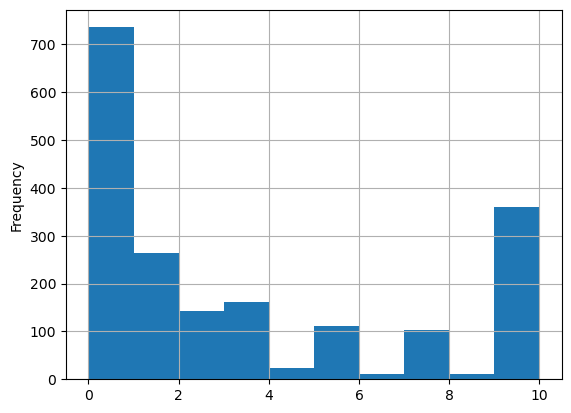

In [14]:
df.Social_Responsiveness_Scale.plot(kind ='hist',grid =True)
plt.show()

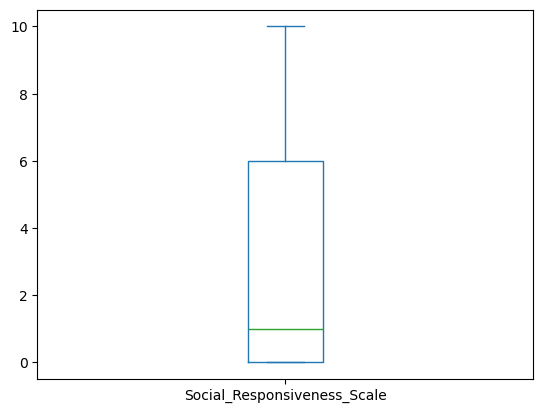

In [15]:
df.Social_Responsiveness_Scale.plot(kind ='box')
plt.show()

Text(0.5, 1.0, 'Composition of different ethnics ')

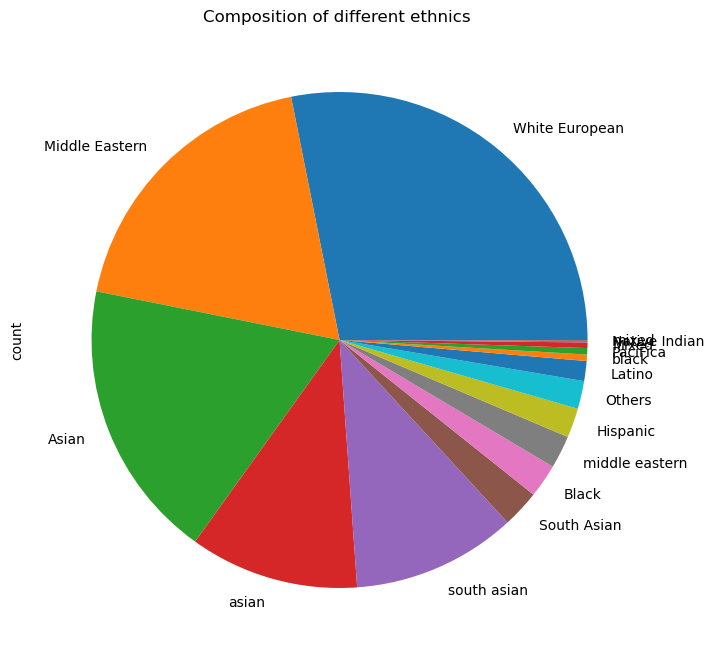

In [16]:
plt.figure(figsize = (8,10))
#Composition of Ethnicity variable:
ax = df.Ethnicity.value_counts().plot(kind ='pie')
ax.set_title("Composition of different ethnics ")

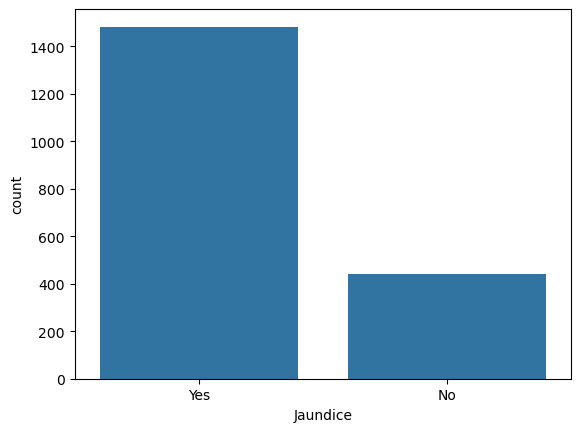

In [17]:
#Distribution of Jaundice variable
sns.countplot(x = 'Jaundice',data = df)
plt.show()

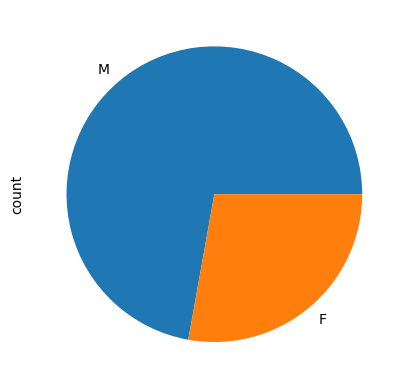

In [18]:
#Composition of Sex variable:
ax = df.Sex.value_counts().plot(kind ='pie')

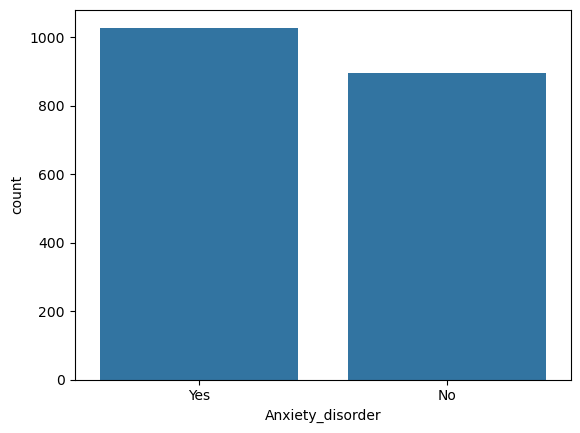

In [19]:
#Distribution of Anxiety_Disorder in predicting ASD traits:
sns.countplot(x = 'Anxiety_disorder',data = df)
plt.show()

#### 이변량

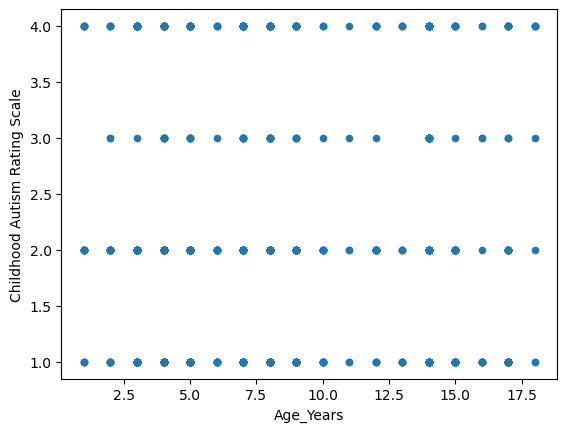

In [20]:
df.plot(x ='Age_Years', y ='Childhood Autism Rating Scale', kind ='scatter')
plt.show()

In [21]:
df.select_dtypes(['float64' , 'int64']).corr() # 상관관계

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Childhood Autism Rating Scale
CASE_NO_PATIENT'S,1.000000,-0.513282,-0.453949,-0.392613,-0.469860,-0.482796,-0.523089,-0.562147,-0.449625,-0.454330,-0.216828,-0.494377,0.199300,-0.393165,-0.562539
A1,-0.513282,1.000000,0.636122,0.465419,0.508709,0.533473,0.614322,0.606938,0.464566,0.552648,0.251465,0.475172,-0.058872,0.567530,0.408748
A2,-0.453949,0.636122,1.000000,0.401531,0.479825,0.481337,0.536366,0.544507,0.454785,0.477304,0.249183,0.383116,-0.059505,0.546621,0.338144
A3,-0.392613,0.465419,0.401531,1.000000,0.669954,0.530371,0.508309,0.465508,0.434346,0.544221,0.143001,0.396457,-0.068107,0.537571,0.305651
A4,-0.469860,0.508709,0.479825,0.669954,1.000000,0.561406,0.582092,0.583863,0.478151,0.610613,0.174543,0.469228,-0.070472,0.579696,0.397497
A5,-0.482796,0.533473,0.481337,0.530371,0.561406,1.000000,0.626327,0.603674,0.525217,0.618670,0.195563,0.475777,-0.067407,0.582686,0.358776
A6,-0.523089,0.614322,0.536366,0.508309,0.582092,0.626327,1.000000,0.631194,0.517827,0.619650,0.217351,0.502556,-0.053380,0.594680,0.411922
A7,-0.562147,0.606938,0.544507,0.465508,0.583863,0.603674,0.631194,1.000000,0.522925,0.598341,0.291981,0.556081,-0.089258,0.569238,0.421958
A8,-0.449625,0.464566,0.454785,0.434346,0.478151,0.525217,0.517827,0.522925,1.000000,0.495235,0.203746,0.428780,-0.075221,0.513093,0.326017
A9,-0.454330,0.552648,0.477304,0.544221,0.610613,0.618670,0.619650,0.598341,0.495235,1.000000,0.176862,0.456559,-0.033723,0.596274,0.358184


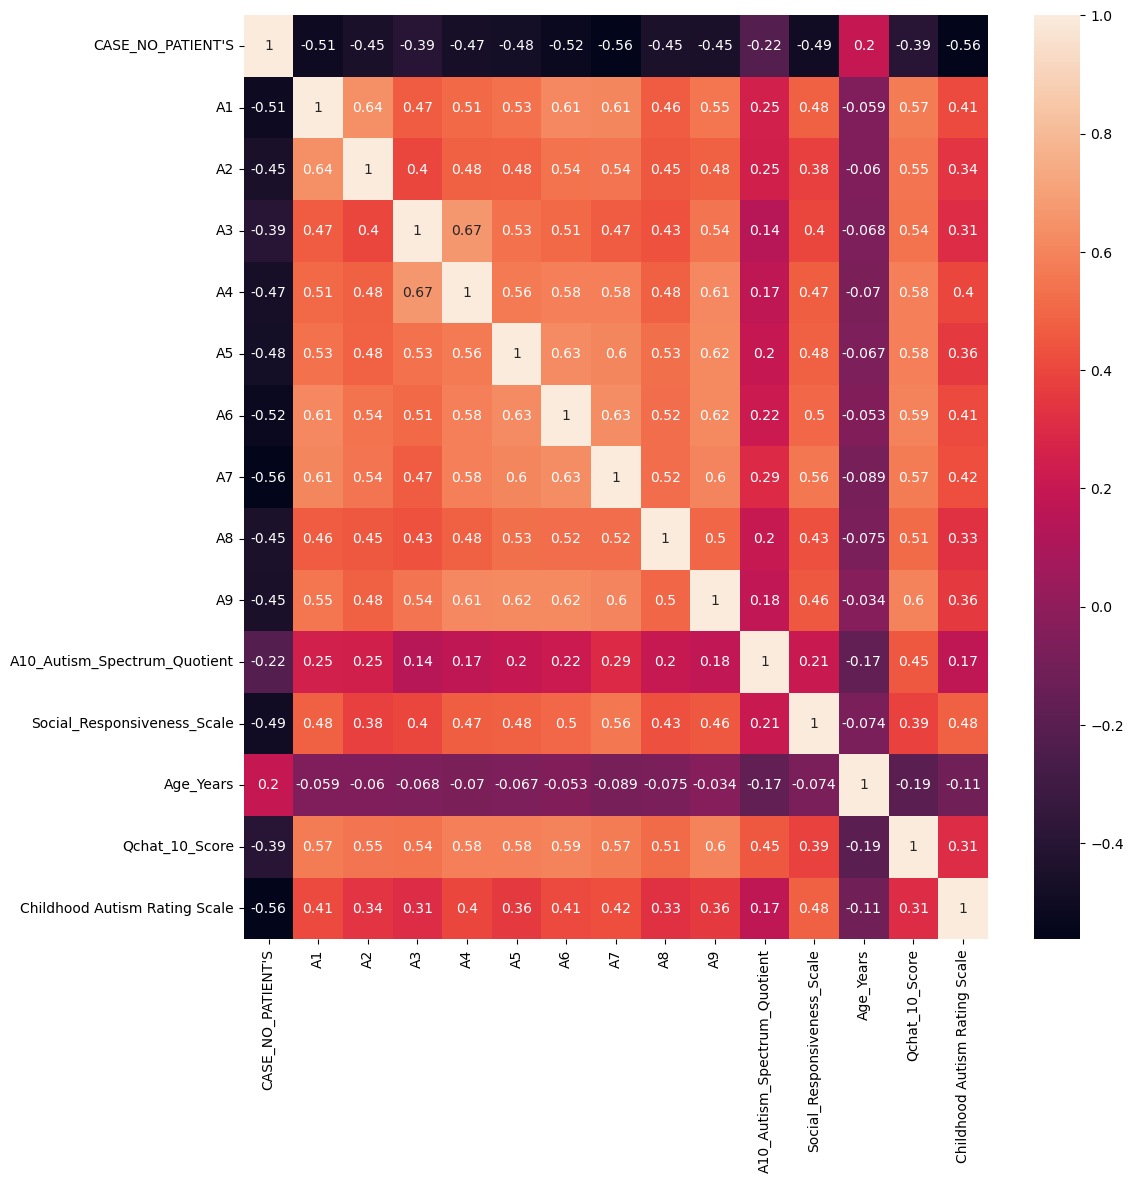

In [22]:
plt.figure(figsize = (12,12))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot =True)
plt.show()

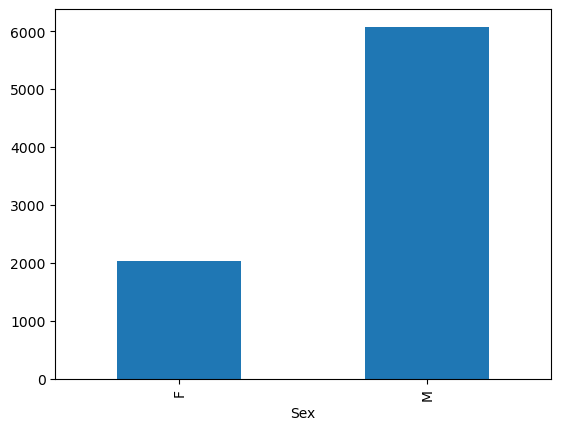

In [23]:
#Comparison between Sex and Qchat-10-Score
df.groupby('Sex').Qchat_10_Score.sum().plot(kind ='bar')
plt.show()

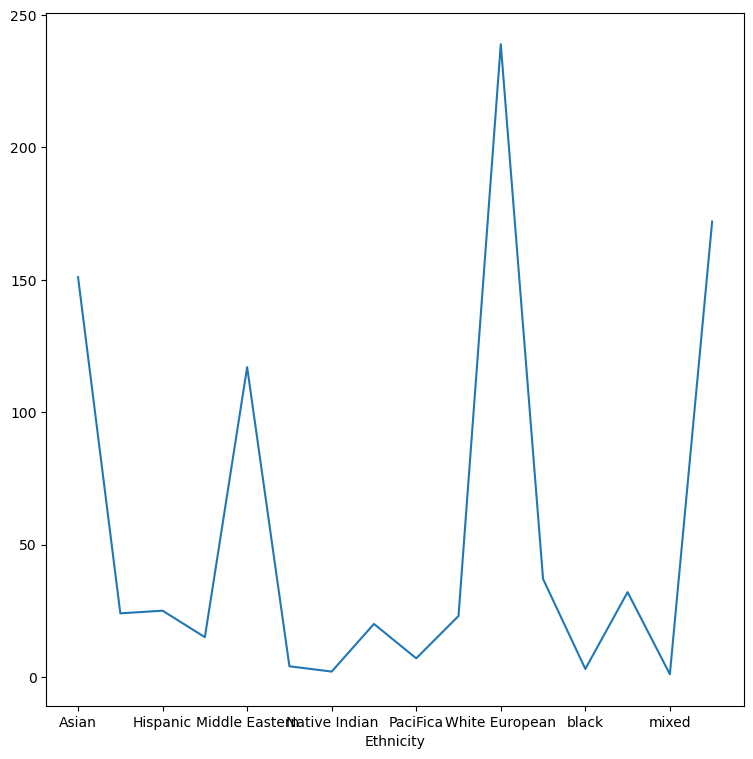

In [24]:
plt.figure(figsize =(9,9))
df.groupby('Ethnicity').A10_Autism_Spectrum_Quotient.sum().plot(kind ='line')
plt.show()

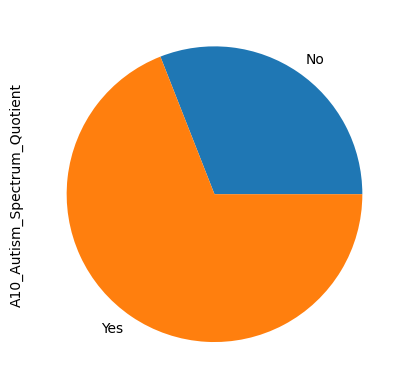

In [25]:
#Composition of Autism_Spectrum_Quotient by Anxiety_disorder
df.groupby('Anxiety_disorder').A10_Autism_Spectrum_Quotient.sum().plot(kind ='pie')
plt.show()

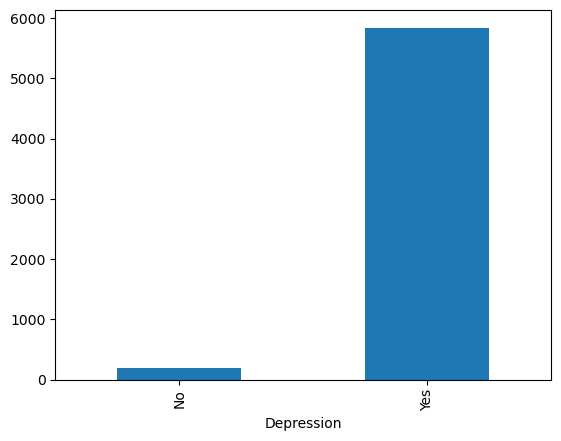

In [27]:
#Comparison between Social_Responsiveness_Scale and Depression:Area chart
df.groupby('Depression').Social_Responsiveness_Scale.sum().plot(kind ='bar')
plt.show()

In [29]:
# Relationship between ASD_Traits and Sex:
pd.crosstab(df.Sex,df.ASD_traits)

ASD_traits,No,Yes
Sex,,
F,425,110
M,480,908


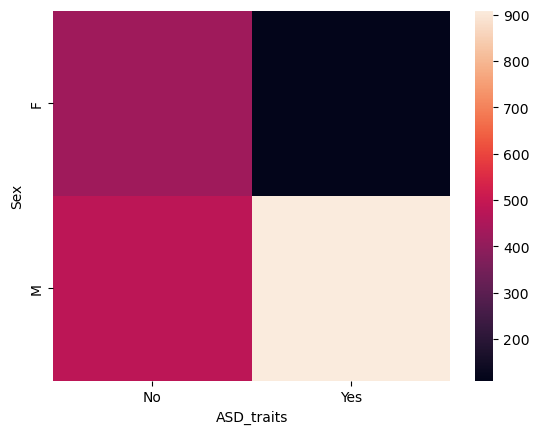

In [30]:
#Creating heatmap on top:
sns.heatmap(pd.crosstab(df.Sex,df.ASD_traits))
plt.show()

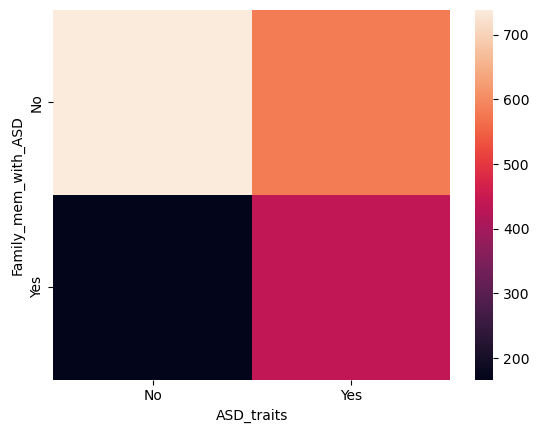

In [31]:
#Relationship between Family_mem_with_ASD and ASD_traits:
sns.heatmap(pd.crosstab(df.Family_mem_with_ASD, df.ASD_traits))
plt.show()

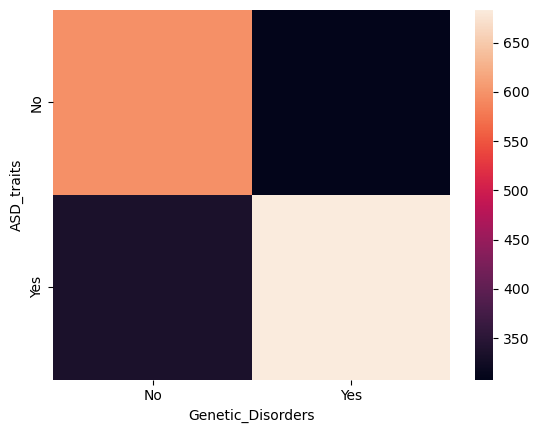

In [32]:
#Relationship between ASD_traits and Genetic_Disorders:
sns.heatmap(pd.crosstab(df.ASD_traits, df.Genetic_Disorders))
plt.show()